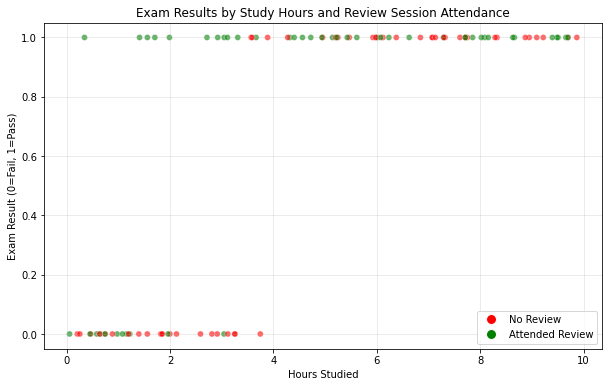

Model Coefficients:
Hours_Studied: 1.365
Review_Session: 1.877
Intercept: -4.612

Accuracy: 0.930
AUC Score: 0.976



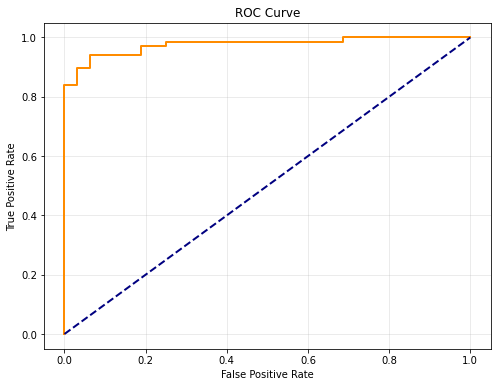

In [9]:
#Question 1.b

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


file_path = r"https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03102025_CW/student_data.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
colors = {0: 'red', 1: 'green'}
plt.scatter(df['Hours_Studied'], df['Results'],
            c=df['Review_Session'].map(colors),
            alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Exam Results by Study Hours and Review Session Attendance')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Result (0=Fail, 1=Pass)')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='No Review'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Attended Review')
])
plt.grid(True, alpha=0.3)
plt.show()

X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

model = LogisticRegression()
model.fit(X, y)

print("Model Coefficients:")
print(f"Hours_Studied: {model.coef_[0][0]:.3f}")
print(f"Review_Session: {model.coef_[0][1]:.3f}")
print(f"Intercept: {model.intercept_[0]:.3f}\n")

y_pred = model.predict(X)
y_probs = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
auc_score = roc_auc_score(y, y_probs)

print(f"Accuracy: {accuracy:.3f}")
print(f"AUC Score: {auc_score:.3f}\n")


fpr, tpr, thresholds = roc_curve(y, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
#Question 2.

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

file_path = r"https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/03102025_CW/student_data.csv"
df = pd.read_csv(file_path)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

print("Training Linear Kernel SVM...")
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)
print("Linear SVM training completed.\n")

print("Training RBF Kernel SVM with Grid Search...")

parameters = {
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

rbf_svm = SVC(kernel='rbf')

grid_search = GridSearchCV(
    estimator=rbf_svm,
    param_grid=parameters,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1  
)

grid_search.fit(X, y)

print("\nGrid Search Results:")
print(f"Best Gamma: {grid_search.best_params_['gamma']}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}")

best_rbf_svm = grid_search.best_estimator_
print("\nRBF SVM with optimal gamma training completed.")

Training Linear Kernel SVM...
Linear SVM training completed.

Training RBF Kernel SVM with Grid Search...

Grid Search Results:
Best Gamma: 0.1
Best Cross-Validation Accuracy: 0.930

RBF SVM with optimal gamma training completed.
